In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan)

In [2]:
data = np.loadtxt("nr_05.39.53_1371.dat", unpack=True)
print(data[0])

[ 46.86055   47.531799  47.476551  48.221245  47.682724  48.628418
  48.640388  48.70277   48.157734  48.917816  48.400658  48.940022
  48.799423  49.1124    48.950996  49.169922  49.367863  50.310852
  50.71986   50.504845  50.972336  50.839718  51.046089  51.626358
  52.592155  51.961735  52.700314  52.089386  53.213352  52.577969
  53.288235  52.752731  53.437756  52.795677  52.640182  52.184212
  52.120476  51.835373  51.398502  51.259171  50.407158  50.273781
  49.358643  49.873425  49.301174  49.851269  48.896397  49.06303   48.50108
  49.542877  48.770149  49.157951  48.321747  48.454338  47.953861
  48.181599  47.51059   47.282043  46.696426  46.988686  46.411949
  46.599216  46.026848  45.80048   45.877056  46.176849  46.424694
  46.51173   46.644325  46.067024  46.758255  46.496243  46.805035
  46.120762  46.510876  46.065247  46.588619  45.764576  46.433517
  45.767849  46.412647  46.051167  46.237408  45.630489  45.728664
  45.785606  45.909435  46.509109  45.933147  46.036

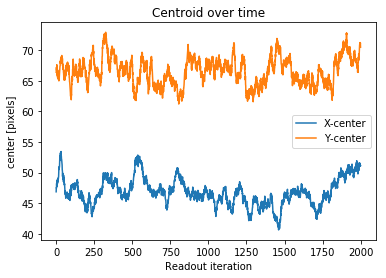

In [3]:
plt.plot (data[0], label="X-center")
plt.plot (data[1], label="Y-center")
plt.legend()
plt.title ("Centroid over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("center [pixels]")
plt.savefig ("nr_05.39.53_1371-xycentroid.png")

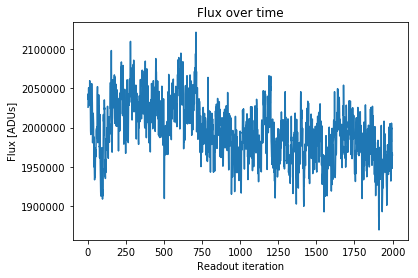

In [4]:
plt.figure()
plt.plot (data[2])
plt.title("Flux over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Flux [ADUs]")
plt.savefig ("nr_05.39.53_1371-flux.png")

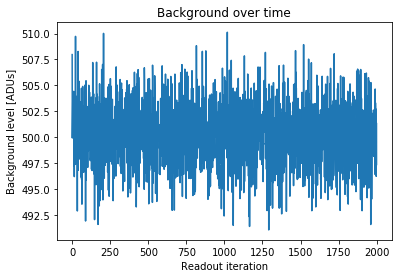

In [5]:
plt.figure()
plt.plot (data[3])
plt.title("Background over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Background level [ADUs]")
plt.savefig ("nr_05.39.53_1371-background.png")

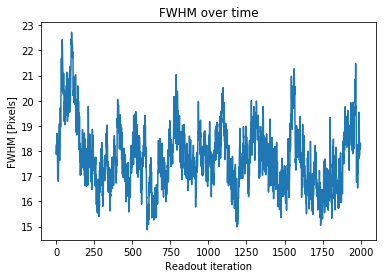

In [6]:
plt.figure()
plt.plot (data[4])
plt.title("FWHM over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("FWHM [Pixels]")
plt.savefig ("nr_05.39.53_1371-fwhm.png")

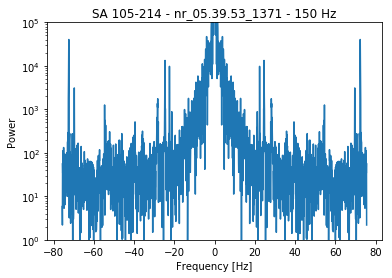

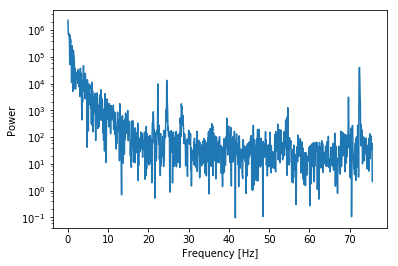

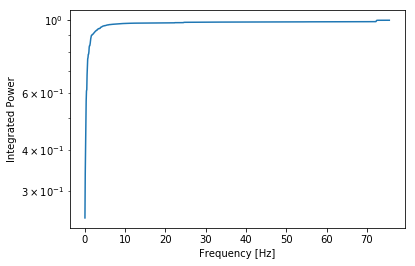

In [7]:
indata = data[0]# - np.mean (data[0])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.006609 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nr_05.39.53_1371 - 150 Hz")
plt.savefig ("nr_05.39.53_1371-powerspectrum.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig ("nr_05.39.53_1371-power.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig ("nr_05.39.53_1371-integratedpower.png")